In [1]:
import numpy as np 
import pandas as pd 
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 
import matplotlib.pyplot as plt 

In [2]:
line_comps = np.load("./line_comps.npy")

/var/folders/84/z8kd1tl11hl96fsszww81rx40000gp/T/ipykernel_1723/3417614446.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


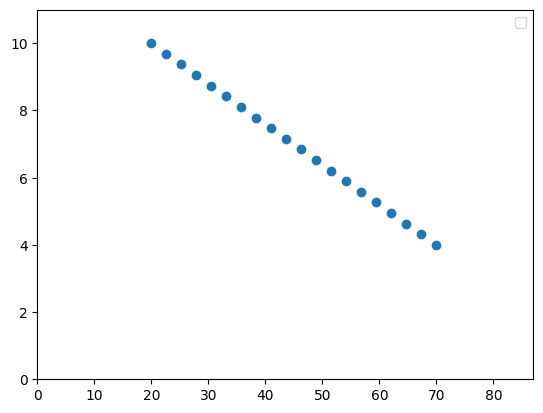

In [3]:
fig, ax = plt.subplots()
ax.scatter(line_comps[:,0], line_comps[:,1])
ax.set_xlim([bounds[0,0], bounds[1,0]])
ax.set_ylim([bounds[0,1], bounds[1,1]])
plt.show()

In [4]:
volumes = line_comps[:,0]
times = line_comps[:,1]
n_samples = len(volumes)

In [5]:
Z2 = np.round(volumes.reshape(-1,1)).astype(int)
Hepes = np.array([54]*n_samples).reshape(-1,1)
Z2M246I = np.array([87]*n_samples).reshape(-1,1)
Au = np.array([13]*n_samples).reshape(-1,1)
array = np.hstack((Hepes, Z2M246I, Au, Z2))
water = 280 - np.sum(array, axis=1).reshape(-1,1)
volume_array = np.hstack((water, array))
volume_df = pd.DataFrame(volume_array, columns=['Water', 'HEPES', 'Z2M246I', 'Au', 'Z2'])
volume_df

,Water,HEPES,Z2M246I,Au,Z2
0,56,54,87,13,70
1,59,54,87,13,67
2,61,54,87,13,65
3,64,54,87,13,62
4,67,54,87,13,59
5,69,54,87,13,57
6,72,54,87,13,54
7,74,54,87,13,52
8,77,54,87,13,49
9,80,54,87,13,46


In [6]:
DT1 = np.array([0]*n_samples).reshape(-1,1)
DT2 = np.array([0]*n_samples).reshape(-1,1)
DT3 = np.array([0]*n_samples).reshape(-1,1)
DT4 = np.round(times.reshape(-1,1)).astype(int)
time_array = np.hstack((DT1, DT2, DT3, DT4))
time_df = pd.DataFrame(time_array, columns=['DT1', 'DT2', 'DT3', 'DT4'])
time_df

,DT1,DT2,DT3,DT4
0,0,0,0,4
1,0,0,0,4
2,0,0,0,5
3,0,0,0,5
4,0,0,0,5
5,0,0,0,6
6,0,0,0,6
7,0,0,0,6
8,0,0,0,7
9,0,0,0,7


In [7]:
volume_df.to_csv('./volumes_line_samples.csv',index=False)
time_df.to_csv('./times_line_samples.csv',index=False)

In [8]:
import numpy as np 
import pandas as pd 
from otto import Create_Directions as CD
from otto import OT2Directions as OT2D

In [9]:
water_vol = np.array([280,0,0,0,0])
water_time = np.array([0,0,0,0])
v_array = np.vstack((volume_df.to_numpy(), water_vol))
t_array = np.vstack((time_df.to_numpy(), water_time))
o_array = np.tile(np.array([1,2,3,4,5]), (v_array.shape[0], 1))
print("Total volumes required :", v_array.sum(axis=0))
print("Total number of samples : ", v_array.shape[0])

Total volumes required : [1900 1080 1740  260  900]
Total number of samples :  21


In [10]:
direction_array = CD.create_directions(v_array, t_array, o_array)
exp = OT2D.experiment()
total_time = exp.calculate_exp_duration(direction_array, action_time = 60)
# save direction array
np.save('./directions_line_samples.npy', direction_array)

Experiment will take a total time of:
2 hours
9 minutes
